# CSE 146 Lab 1: Machine Learning Basics and Overfitting

### ASSIGNED: Sunday, January 12 2019
### DUE: Tuesday, January 21 2019

The purpose of this assignment is for you to gain experience with basic tools for training, evaluating and critiquing machine learning models.

In this lab, you'll make use of Python 3, as well as standard Python libraries for data science pandas, scikit-learn, and matplotlib. If you're new to Python, we encourage you to examine the language documentation (https://docs.python.org/3/), which includes some simple tutorials.


## Instructions 
This assignment is to be done <b>on your own</b>, but you can talk about the assignment with your classmates if you get stuck. (Be sure to list the students you spoke with about this assignment in the space provided below.) As always, please meet with the teaching team (during office hours) if you have difficulties.

Be sure to rename this homework notebook so that it includes your name. 

### List any students you talked with about this assignment here:
1. [person 1]
2. [person 2]
3. etc.

Before starting on this lab, you should make sure you have a solid understanding of machine learning basics. Please be sure to complete the listed modules in Google's [Introduction to Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro).

# Problems
## Part 1: Loading Data (10 points)

As you saw before, Pandas DataFrames are useful structures for working with data in Python. We can load our data from a CSV file directly into a DataFrame and display a sample of rows as output.

The data we are using for this homework is from the "Communities and Crime" dataset available from UC Irvine's Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/communities+and+crime). It includes data about the different types of crimes among various communities, socioeconomic and racial data about each community, and information about the police force in each community.

The last column indicates whether or not there is a high rate of violent crime in the community (1 if yes, 0 if no). This is the target (Y) variable for the dataset. Running the two cells below will display a subset of the entries as well as a list of the column names.

In [1]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("communities.csv")

dataframe.head(5) # Show the first 5 rows of the dataframe

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.0
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00,1.0
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00,1.0
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00,0.0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [2]:
dataframe.columns.values.tolist()

['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEng

We can also extract the numerical values from a DataFrame into a Numpy array. Depending on the situation, these formats have various strengths and weaknesses. Numpy arrays are lightweight and behave much like a standard list, but do not support heterogenous data or many of the Pandas features for indexing and querying.

Below, we extract the values from our dataframe, display the dimensions of the array, and display a subset of the rows and columns. You should find that the values displayed match with the above dataframe output.

More information about array indexing in Numpy is available here: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

In [3]:
data = dataframe.values[:, :]

In [4]:
data.shape

(1994, 123)

In [5]:
data[0:5, 0:5]

array([[0.19, 0.33, 0.02, 0.9 , 0.12],
       [0.  , 0.16, 0.12, 0.74, 0.45],
       [0.  , 0.42, 0.49, 0.56, 0.17],
       [0.04, 0.77, 1.  , 0.08, 0.12],
       [0.01, 0.55, 0.02, 0.95, 0.09]])

### Problem 1.1: Creating X and Y (5 Points)

Create arrays titled "X" and "Y", where X consists of all but the last column of data (for all rows) and Y is exclusively the last column. Print the shape of each array as accessed above.

In [6]:
## TYPE ANSWER HERE



### Problem 1.2: Creating Train and Test Sets (5 points)

Create arrays titled: 
- X_train (first 1000 rows of X)
- X_test (remaining rows of X)
- Y_train (first 1000 rows of y)
- Y_test (remaining rows of y)

As the order of the records in the dataset are randomized, it is fine to simply use the beginning of the file as training and the rest as test.

For the y arrays, you may want to consider using the <code>.ravel()</code> method for "flattening" the array from 2 dimensions down to 1. Print the shape of each array.

In [7]:
## TYPE ANSWER HERE



## Part 2: Training a Model

Scikit-learn features modules for a wide variety of machine learning algorithms, such as logistic regression and decision trees. Read the documentation to understand how to train these models and generate predictions.
- Logistic Regression documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Decision Tree documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [6]:
from sklearn import linear_model, tree

dt = tree.DecisionTreeClassifier(max_depth=5)
logreg = linear_model.LogisticRegression()

### Problem 2.1: Making Predictions with Decision Trees and Linear Regression (10 points)

Using your X_train and Y_train arrays, train:
- a Decision Tree model
- a linear model via Logistic Regression (this may throw a DataConversionWarning which you can ignore)

Using X_test, generate "Y_hat" predictions (one set of predictions with each model). Print the shape of each prediction array. For those new to scikit-learn, see the "predict" method within each model's documentation.

In [11]:
## TYPE ANSWER HERE



## Part 3: Evaluating a Model
### Problem 3.1: Compute Prediction Error (5 points)
Write a function which takes in 2 binary arrays as arguments (i.e. y and y_hat) and computes the prediction error as a decimal between 0 and 1. Use this function to compute the errors for your Decision Tree and Logistic Regression models.

In [8]:
def error(y, y_hat):
    ## TYPE ANSWER HERE
    pass
    
    

In [9]:
(error(y_test, y_hat_dt), error(y_test, y_hat_logreg))

NameError: name 'y_test' is not defined

## Part 4: Visualizing Tradeoffs (20 points)

### Matplotlib

Remember our snazzy library 'matplotlib'? Below we demonstrate some of its features in a generic plot. Hopefully it will be helpful for this next section, where we ask you to plot some tradeoffs.

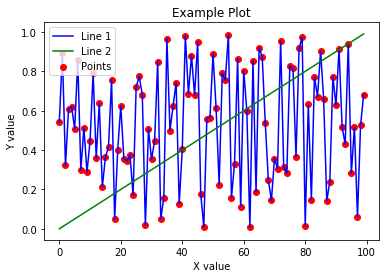

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import random

# Sample 100 random values from [0,1]
y1_example = np.array([random.random() for i in range(100)])
y2_example = np.array([i *0.01 for i in range(100)])
# Create an array with the indices
x_example = np.array(range(len(y1_example)))

# Create a plot with a caption, X and Y legends, etc
x_label = 'X value'
y_label = 'Y value'
plt.title('Example Plot')
plt.xlabel(x_label)
plt.ylabel(y_label)


plt.scatter(x_example, y1_example, color='red', label='Points')
plt.plot(x_example, y1_example, color='blue', label='Line 1')
plt.plot(x_example, y2_example, color='green', label='Line 2')
plt.legend()

plt.show()

### Problem 4.1: Sample Size vs Generalization Error (10 points)

Write code which creates training sets of size $n \in \{10,20,...,990,1000\}$ by taking the first $n$ rows of X_train and Y_train (give these different names from the original arrays). Train Decision Tree and Logistic Regression models with each of these training sets, generate out-of-sample predictions using X_test, and compute error using Y_train as above.

Generate a matplotlib plot with "Sample Size" as the X-axis and "Test Error" as the Y-axis. Plot lines for both the Decision Tree and Logistic Regression results. Plot your lines in different colors and include a legend to specify which line belongs to which model class. 

__Disclaimer:__ The results you will see show that test error decreases quickly the number of samples in the dataset. Often, in practice, it takes tens of thousands of training samples to see a meaningful decrease in test error.

In [15]:
## TYPE ANSWER HERE



### Problem 4.2: Model Complexity vs Generalization Error (10 points)

Vary the max depth of the decision tree from 1 to 15. Plot the resulting error when training a model with all 1000 rows of X_train and Y_train. You can adjust the max depth by reinstantiating the DecisionTreeClassifier module with a max_depth parameter:

`dt = tree.DecisionTreeClassifier(max_depth=i)`

Generate a plot with "Max Depth" as the X-axis and "Test Error" as the Y-axis. Plot the error when predicting labels for X_train as well as X_test for each value of the maximum tree depth. Plot your lines in different colors and include a legend to specify which line belongs to which model class. 

In [11]:
## TYPE ANSWER HERE



## Part 5: Observing Error Disparities (30 points)

In this section, you will explore the disparities in error for different "groups" of the dataset. The error disparity between two test sets with errors $\epsilon_1$ and $\epsilon_2$ is $|\epsilon_1 - \epsilon_2|$. 



### Problem 5.1: Splitting by Feature Values (10 points)

Write a function which takes in X and Y arrays, a column number, and a threshold. The function should return arrays X0 and Y0 containing all rows where the value in the specified column falls strictly below the threshold, as well as arrays X1 and Y1 containing all rows where the the value in the specified column is above or equal to the threshold. 


Numpy supports indexing via an array of values, which allows you to extract a non-contiguous subset of rows from an array. You might find this helpful. More information is available here: https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html

In [9]:
def split_on_feature(X_test, Y_test, column, thresh):
    ## TYPE ANSWER HERE
    
    
    return (X0_test, X1_test, Y0_test, Y1_test) 

### Problem 5.2: Calculating All Discrepancies (10 points)

Now, let's evaluate the error disparities for the model you previously trained in Section 2.1. If you used the same naming conventions for sections 3 and 4, the models may have been overwritten. If that's the case, make sure to rerun the code in Section 2.1. 

For each feature in the dataset, use the function from 5.1 to split on that column when the threshold is set to 0.5. Then compute the error disparity for the feature by calculating the error of predictions made on both X0 and X1. 

This cell should print out the columns _by name_ (using the list of names in the Pandas dataframe) along with their corresponding error discrepancies, and should print in descending order of error discrepancy. You should omit columns where either of the splits have fewer than 100 rows.

In [17]:
## TYPE ANSWER HERE



### Problem 5.3: Other Types of Discrepancies (10 points)

Instead of error disparities, let's compute two other types of errors that are of interest to us: False Negative Disparity and False Positive Disparity. 

For the feature racePctblack (percentage of population that is African-American), which is in column 2, compute the False Positive rate and False Negative rate using the provided functions. You should threshold the feature at 0.5 as earlier to create the two sets of samples.

In [ ]:
## INPUTS:
# y - true labels
# y_hat - predicted labels
def fp_error(y, y_hat):
    fp_errors = [np.maximum(y_hat[i] - y[i], 0) for i in range(len(y))]
    return np.mean(fp_errors)

## INPUTS:
# y - true labels
# y_hat - predicted labels
def fn_error(y, y_hat):
    fn_errors = [np.maximum(y[i] - y_hat[i], 0) for i in range(len(y))]
    return np.mean(fn_errors)

In [18]:
## TYPE ANSWER HERE

print('False Positive Error Rate of Communities with Above Median Black Population: ', y1_fperr)
print('False Positive Error Rate of Communities with Below Median Black Population: ', y0_fperr)

print('False Negative Error Rate of Communities with Above Median Black Population: ', y1_fnerr)
print('False Negative Error Rate of Communities with Below Median Black Population: ', y0_fnerr)

NameError: name 'y1_fperr' is not defined

## Part 6: Short Response Questions (30 points)

#### Q1: When training a machine learning model with some dataset, what are some assumptions we are making about the data? What are some things that it is important for us not to assume? Please give a few examples for each. (5 points)

*click here to enter your answer*

#### Q2: Why is it important to evaluate our model on data which was not used in training? What is the error rate on "test" or "holdout" data supposed to be a proxy for? (5 points)

*click here to enter your answer*

#### Q3: In your own words, explain the results of your plot from 4.1. Why does it make sense that these results occur? (5 points)

*click here to enter your answer*

#### Q4: In your own words, explain the results of your plot from 4.2. Why does it make sense that these results occur? (5 points)

*click here to enter your answer*

#### Q5: In your own words, explain the results of section 5.3. What are some possible implications of this model in terms of unfairness? (5 points)

*click here to enter your answer*

#### Q6: Look through the available features on the dataset we used, available at http://archive.ics.uci.edu/ml/datasets/communities+and+crime. What are two attributes that you would expect to have high error disparity? What are two attributes you would expect to have low error disparity? (5 points)

*click here to enter your answer*

## EXTRA CREDIT: Part 7 (5-10 points)

Play around with the data and generate some kind of plot (via matplotlib) that you find interesting. Write a few sentences about your process, what you found, and what you think it suggests about the data. This could be an evaluation of multiple model classes, a statistical analysis of different features, unsupervised analysis, extending the investigation into error discrepancies, or anything else you can think of. 

Any well-justified solution will earn up to 5 points of extra credit.